In [1]:
import datacube
from datacube.storage import masking
from datacube import Datacube
from datetime import datetime
from skimage import exposure

from datacube_stats.statistics import GeoMedian
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
cdict = {'red':   ((0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'purple': ((0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0))}

In [3]:
x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2*np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

In [4]:
Z

array([[ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.99833417,  0.99334665,  0.97843395, ..., -0.96934071,
        -0.98834333, -0.99747076],
       [ 1.98669331,  1.97676812,  1.94709171, ..., -1.92899609,
        -1.96681147, -1.98497512],
       ..., 
       [-2.79415498, -2.78019585, -2.73845791, ...,  2.71300759,
         2.76619247,  2.79173846],
       [-1.82162504, -1.81252451, -1.78531382, ...,  1.76872171,
         1.80339512,  1.82004961],
       [-0.83089403, -0.82674302, -0.81433147, ...,  0.80676334,
         0.82257885,  0.83017543]])

In [7]:
help(LinearSegmentedColormap.from_list)

Help on function from_list in module matplotlib.colors:

from_list(name, colors, N=256, gamma=1.0)
    Make a linear segmented colormap with *name* from a sequence
    of *colors* which evenly transitions from colors[0] at val=0
    to colors[-1] at val=1.  *N* is the number of rgb quantization
    levels.
    Alternatively, a list of (value, color) tuples can be given
    to divide the range unevenly.



In [11]:
the_name = 'customlist'
the_colours = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]


In [12]:
LinearSegmentedColormap.from_list(the_name, the_colours, N=100)

In [11]:
blue_red1 = LinearSegmentedColormap('BlueRed1', cdict)
plt.register_cmap(cmap=blue_red1)

ValueError: Colormap customlist is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

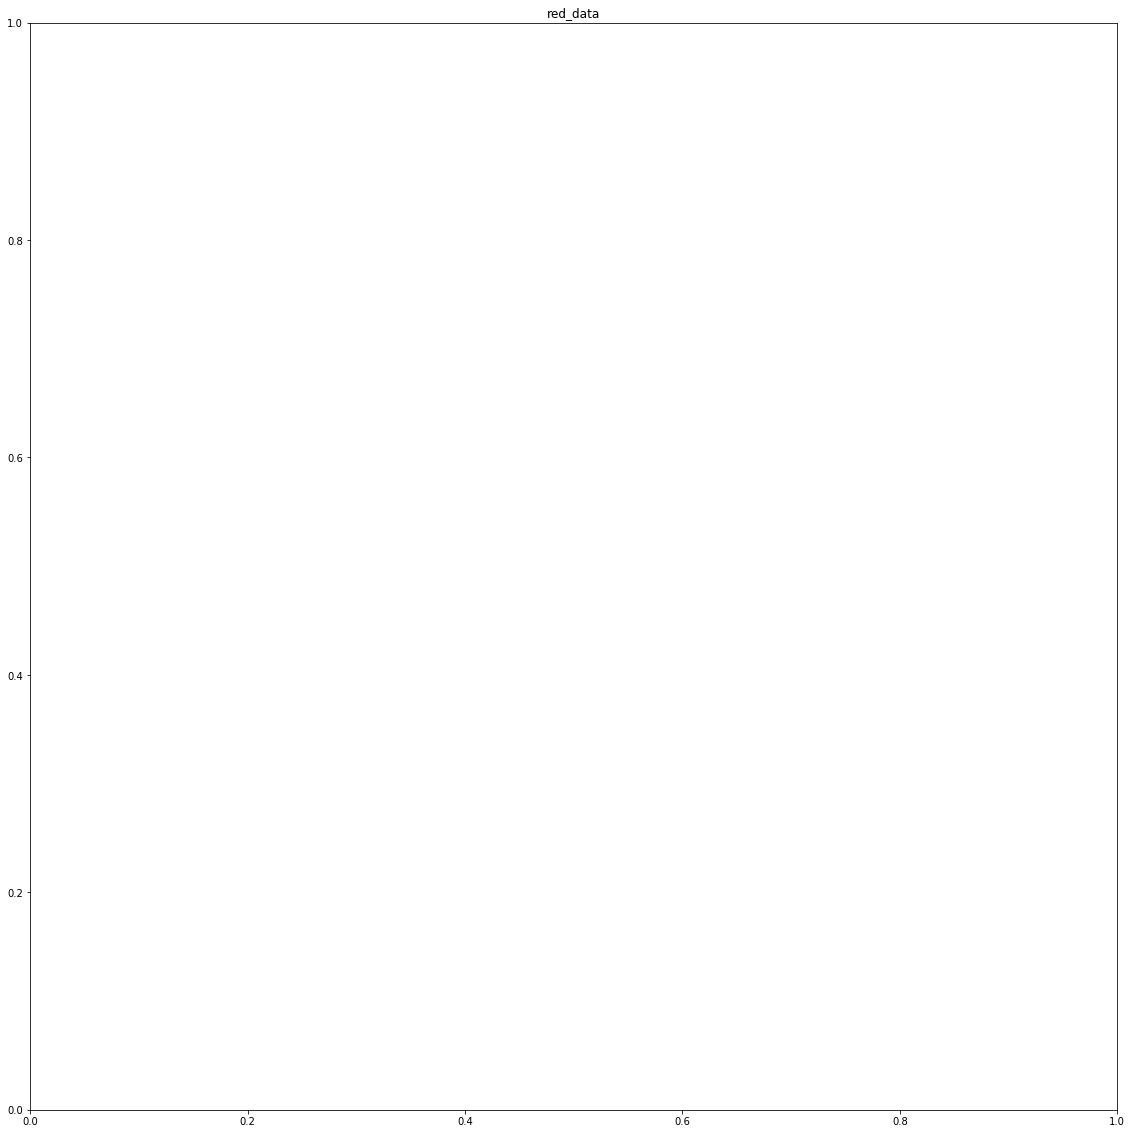

In [15]:

fig, ax = plt.subplots(figsize=(20,20))
plt.title('red_data')
ax.imshow(Z, cmap='customlist')